# News Mood Analysis

Sentiment analysis of the Tweets sent out by the following news organizations: 
* BBC
* CBS
* CNN
* ABC
* NPR
* New York times 

In [69]:
%matplotlib notebook
%matplotlib inline

In [70]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [71]:
pd.set_option('display.max_rows', 500)

### Extract Data from Twitter API and  Export data

In [72]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [73]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [74]:
target_users = ("abcnews", "CNN", "CBS", "nytimes", "BBC", "NPR")

sentiments = {}

for user in target_users:
    d = {f"compound_{user}": [],
         f"pos_{user}": [],
         f"neg_{user}": [],
         f"neu_{user}": [],
         f"tweet_{user}": [],
         f"tweet_time_{user}": [],
         f"tweet_ago_{user}": []}
    sentiments.update(d)

In [75]:
# Get 100 tweets for each news network, and organize the data based on Vader Analysis
date = datetime.strftime(datetime.now(), "%m/%d/%Y")
date_time = datetime.strftime(datetime.now(), "%a %b %d %H:%M:%S %z %Y")

for target_user in target_users:
    
    public_tweets = [] 

    for page_num in range(1, 6):
        tweets = api.user_timeline(target_user, page=page_num, type='recent')
        public_tweets += tweets
        
    number_of_tweets = len(public_tweets)
    
    for num in range(number_of_tweets):   
        tweet = public_tweets[num]
        tweet_time = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
       
        # Calculate the time between the two tweets
        if num == (number_of_tweets - 1): # for the last tweet
            tweet_ago = 0 
        else:
            previous_tweet = public_tweets[num+1]
            previous_tweet_time = datetime.strptime(previous_tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
            tweet_ago = round((tweet_time - previous_tweet_time).seconds/60, 2) # in minutes
        
        # Run Vader Analysis on tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        if (analyzer.polarity_scores(tweet["text"])["neg"]) != 0:
            neg = analyzer.polarity_scores(tweet["text"])["neg"] * -1 
        else:
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        tweet = tweet["text"]

        # Add each value to the sentiments
        sentiments[f"compound_{target_user}"].append(compound)
        sentiments[f"pos_{target_user}"].append(pos)
        sentiments[f"neg_{target_user}"].append(neg)
        sentiments[f"neu_{target_user}"].append(neu)
        sentiments[f"tweet_{target_user}"].append(tweet)
        sentiments[f"tweet_time_{target_user}"].append(tweet_time)
        sentiments[f"tweet_ago_{target_user}"].append(tweet_ago)

print("done")    

done


### Data cleaning and convert sentiment data into pandas dataframe

In [76]:
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.to_csv("sentiments.csv", encoding='utf-8', index=False)

In [77]:
sentiments_df.head()

,compound_abcnews,pos_abcnews,neg_abcnews,neu_abcnews,tweet_abcnews,tweet_time_abcnews,tweet_ago_abcnews,compound_CNN,pos_CNN,neg_CNN,...,tweet_BBC,tweet_time_BBC,tweet_ago_BBC,compound_NPR,pos_NPR,neg_NPR,neu_NPR,tweet_NPR,tweet_time_NPR,tweet_ago_NPR
0,0.0000,0.0,0.000,1.000,Hip hop used to teach preschool children about...,2019-03-02 22:02:27+00:00,17.33,-0.6908,0.000,-0.217,...,"Tonight, England face current champions USA in...",2019-03-02 18:01:07+00:00,60.02,0.4404,0.162,0.0,0.838,One of President Trump's many supporters at th...,2019-03-02 22:02:00+00:00,2.45
1,-0.5994,0.0,-0.245,0.755,Schools become the new frontline in the war be...,2019-03-02 21:45:07+00:00,0.00,-0.8658,0.000,-0.326,...,"""Losing my sight made me more aware of the bea...",2019-03-02 17:01:06+00:00,60.03,0.0000,0.000,0.0,1.000,Trump Slams Russia Investigation And Green New...,2019-03-02 21:59:33+00:00,27.55
2,0.0000,0.0,0.000,1.000,'It's too soon': Caitlin was just 23 weeks pre...,2019-03-02 21:45:07+00:00,4.28,0.7506,0.252,0.000,...,'Millennial burnout' is more than just a 'snow...,2019-03-02 16:01:04+00:00,59.98,0.0772,0.067,0.0,0.933,The top-ranked U.S. Women's National Soccer Te...,2019-03-02 21:32:00+00:00,13.77
3,0.0000,0.0,0.000,1.000,China lashes Canada over Huawei extradition an...,2019-03-02 21:40:50+00:00,8.43,0.0000,0.000,0.000,...,Have potatoes secretly been a health food this...,2019-03-02 15:01:05+00:00,120.00,0.0000,0.000,0.0,1.000,Note: This story is developing and will be upd...,2019-03-02 21:18:14+00:00,3.15
4,0.0000,0.0,0.000,1.000,"From radioactive silos to tropical gothic, ecc...",2019-03-02 21:32:24+00:00,8.28,0.0772,0.067,0.000,...,Lotte Reiniger is one of the unsung heroes of ...,2019-03-02 13:01:05+00:00,59.98,0.0000,0.000,0.0,1.000,(2/2) Police responded to a 911 call about a m...,2019-03-02 21:15:05+00:00,1.28


In [78]:
sentiments_df.shape

(100, 42)

In [79]:
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
compound_abcnews      100 non-null float64
pos_abcnews           100 non-null float64
neg_abcnews           100 non-null float64
neu_abcnews           100 non-null float64
tweet_abcnews         100 non-null object
tweet_time_abcnews    100 non-null datetime64[ns, UTC]
tweet_ago_abcnews     100 non-null float64
compound_CNN          100 non-null float64
pos_CNN               100 non-null float64
neg_CNN               100 non-null float64
neu_CNN               100 non-null float64
tweet_CNN             100 non-null object
tweet_time_CNN        100 non-null datetime64[ns, UTC]
tweet_ago_CNN         100 non-null float64
compound_CBS          100 non-null float64
pos_CBS               100 non-null float64
neg_CBS               100 non-null float64
neu_CBS               100 non-null float64
tweet_CBS             100 non-null object
tweet_time_CBS        100 non-null datetime64[ns, UTC]
twe

In [80]:
sentiments_df.describe()

,compound_abcnews,pos_abcnews,neg_abcnews,neu_abcnews,tweet_ago_abcnews,compound_CNN,pos_CNN,neg_CNN,neu_CNN,tweet_ago_CNN,...,compound_BBC,pos_BBC,neg_BBC,neu_BBC,tweet_ago_BBC,compound_NPR,pos_NPR,neg_NPR,neu_NPR,tweet_ago_NPR
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.063889,0.081160,-0.111470,0.807350,22.800400,0.045174,0.069430,-0.052230,0.878350,11.449800,...,0.216574,0.106060,-0.041640,0.852320,88.800000,0.033906,0.063990,-0.055910,0.880100,20.739800
std,0.409313,0.112005,0.133777,0.155574,46.541872,0.388228,0.098518,0.092231,0.125247,7.118062,...,0.400190,0.106834,0.077173,0.121497,153.507572,0.401782,0.090302,0.111209,0.120681,14.662979
min,-0.790600,0.000000,-0.438000,0.467000,0.000000,-0.865800,0.000000,-0.326000,0.517000,0.000000,...,-0.801600,0.000000,-0.324000,0.532000,0.000000,-0.875000,0.000000,-0.625000,0.375000,0.000000
25%,-0.476700,0.000000,-0.227000,0.712750,3.357500,0.000000,0.000000,-0.085250,0.770000,5.995000,...,0.000000,0.000000,-0.082500,0.751750,30.080000,-0.012900,0.000000,-0.071750,0.810750,10.030000
50%,0.000000,0.000000,0.000000,0.793000,10.865000,0.000000,0.000000,0.000000,0.915000,11.015000,...,0.294200,0.115500,0.000000,0.854500,59.955000,0.000000,0.000000,0.000000,0.889500,20.000000
75%,0.159300,0.146750,0.000000,1.000000,21.162500,0.272500,0.131750,0.000000,1.000000,14.970000,...,0.526700,0.164250,0.000000,1.000000,60.080000,0.345300,0.128500,0.000000,1.000000,30.000000
max,0.875000,0.500000,0.000000,1.000000,353.520000,0.932500,0.483000,0.000000,1.000000,30.130000,...,0.933700,0.468000,0.000000,1.000000,779.880000,0.896500,0.404000,0.000000,1.000000,63.000000


### Preparing data

In [81]:
sentiment_new_df = sentiments_df.copy()
sentiment_new_df.columns

Index(['compound_abcnews', 'pos_abcnews', 'neg_abcnews', 'neu_abcnews',
       'tweet_abcnews', 'tweet_time_abcnews', 'tweet_ago_abcnews',
       'compound_CNN', 'pos_CNN', 'neg_CNN', 'neu_CNN', 'tweet_CNN',
       'tweet_time_CNN', 'tweet_ago_CNN', 'compound_CBS', 'pos_CBS', 'neg_CBS',
       'neu_CBS', 'tweet_CBS', 'tweet_time_CBS', 'tweet_ago_CBS',
       'compound_nytimes', 'pos_nytimes', 'neg_nytimes', 'neu_nytimes',
       'tweet_nytimes', 'tweet_time_nytimes', 'tweet_ago_nytimes',
       'compound_BBC', 'pos_BBC', 'neg_BBC', 'neu_BBC', 'tweet_BBC',
       'tweet_time_BBC', 'tweet_ago_BBC', 'compound_NPR', 'pos_NPR', 'neg_NPR',
       'neu_NPR', 'tweet_NPR', 'tweet_time_NPR', 'tweet_ago_NPR'],
      dtype='object')

In [82]:
columns_to_delete = ['compound_abcnews', 'tweet_abcnews', 'tweet_time_abcnews', 'tweet_ago_abcnews', 'compound_CNN', 
           'tweet_CNN', 'tweet_time_CNN', 'tweet_ago_CNN', 'compound_CBS', 'tweet_CBS', 'tweet_time_CBS', 
           'tweet_ago_CBS', 'compound_nytimes', 'tweet_nytimes', 'tweet_time_nytimes', 'tweet_ago_nytimes',
           'compound_BBC', 'tweet_BBC', 'tweet_time_BBC', 'tweet_ago_BBC', 'compound_NPR','tweet_NPR', 
           'tweet_time_NPR', 'tweet_ago_NPR']
sentiment_new_df.drop(columns_to_delete, inplace=True, axis=1)
sentiment_new_df.head()

,pos_abcnews,neg_abcnews,neu_abcnews,pos_CNN,neg_CNN,neu_CNN,pos_CBS,neg_CBS,neu_CBS,pos_nytimes,neg_nytimes,neu_nytimes,pos_BBC,neg_BBC,neu_BBC,pos_NPR,neg_NPR,neu_NPR
0,0.0,0.000,1.000,0.000,-0.217,0.783,0.000,0.0,1.000,0.000,-0.204,0.796,0.152,0.000,0.848,0.162,0.0,0.838
1,0.0,-0.245,0.755,0.000,-0.326,0.674,0.188,0.0,0.812,0.000,-0.200,0.800,0.204,-0.084,0.712,0.000,0.0,1.000
2,0.0,0.000,1.000,0.252,0.000,0.748,0.000,0.0,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.067,0.0,0.933
3,0.0,0.000,1.000,0.000,0.000,1.000,0.188,0.0,0.812,0.256,0.000,0.744,0.000,0.000,1.000,0.000,0.0,1.000
4,0.0,0.000,1.000,0.067,0.000,0.933,0.000,0.0,1.000,0.141,0.000,0.859,0.171,0.000,0.829,0.000,0.0,1.000


In [83]:
# Count positive, negative, neutral tweets for each network
sentiment_count = { "abcnews": [], "CNN": [], "CBS": [], "nytimes": [], "BBC": [], "NPR": []}
for column in sentiment_new_df.columns:
    sentiment = column.split("_")[0]
    news_channel = column.split("_")[1]
    if sentiment == 'pos': 
        sentiment_count[news_channel].append(sentiment_new_df[sentiment_new_df[column] > 0.000][column].count())
    elif  sentiment == 'neg':
        sentiment_count[news_channel].append(sentiment_new_df[sentiment_new_df[column] < 0.000][column].count())
    elif sentiment == 'neu':
        sentiment_count[news_channel].append(sentiment_new_df[sentiment_new_df[column] == 1.000][column].count())
sentiment_count

{'abcnews': [42, 47, 29],
 'CNN': [42, 31, 40],
 'CBS': [62, 14, 34],
 'nytimes': [40, 37, 34],
 'BBC': [58, 29, 29],
 'NPR': [41, 26, 36]}

In [84]:
# Convert into percentage, and convert into dataframe
sentiment_pct = {}
for key, value in sentiment_count.items():
    total = sum(value)
    pct = [int((i/total)*100) for i in value]
    sentiment_pct[key] = pct
sentiment_pct_df = pd.DataFrame(sentiment_pct)
sentiment_pct_df

,abcnews,CNN,CBS,nytimes,BBC,NPR
0,35,37,56,36,50,39
1,39,27,12,33,25,25
2,24,35,30,30,25,34


In [85]:
# Transpose the dataframe
sentiment_pct_transposed = sentiment_pct_df.T
sentiment_pct_transposed.rename(columns={0: 'positive', 1: 'negative', 2: 'neutral'}, inplace=True)
sentiment_pct_transposed.sort_values(by=['negative'], ascending=False, inplace=True)
sentiment_pct_transposed = sentiment_pct_transposed[['negative', 'positive', 'neutral']]
sentiment_pct_transposed

,negative,positive,neutral
abcnews,39,35,24
nytimes,33,36,30
CNN,27,37,35
BBC,25,50,25
NPR,25,39,34
CBS,12,56,30


### Analyze positive, negative, and neutral tweets for each news network

#### Tweets frequency

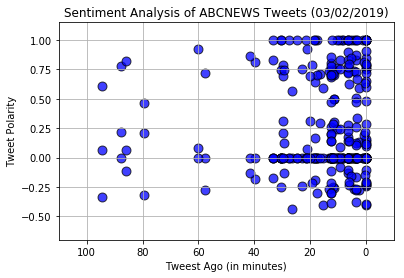

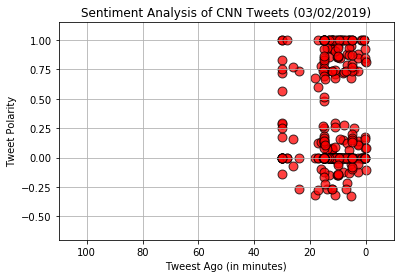

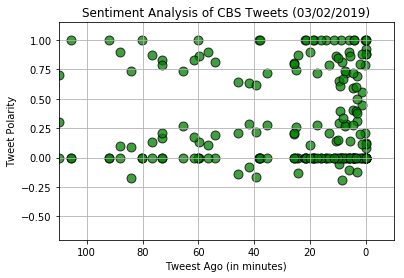

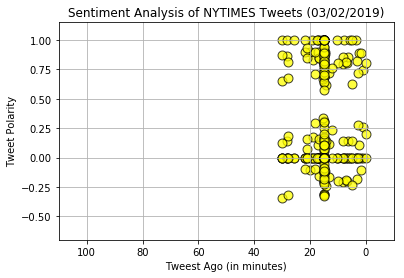

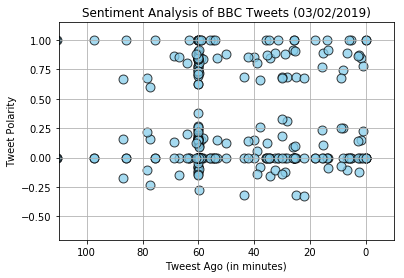

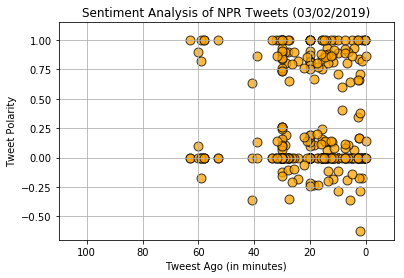

In [87]:
target_users_with_colors = {"abcnews": "blue", "CNN": "red", "CBS": "green", "nytimes": "yellow", "BBC": "skyblue", "NPR": "orange"}

for key, value in target_users_with_colors.items():
    plt.figure(figsize=(6,4))

    plt.xlim(110, -10)
    plt.ylim(-0.7, 1.15)
    plt.grid(True)

    plt.title(f"Sentiment Analysis of {key.upper()} Tweets ({date})")
    plt.xlabel("Tweest Ago (in minutes)")
    plt.ylabel("Tweet Polarity")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"pos_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neg_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neu_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")

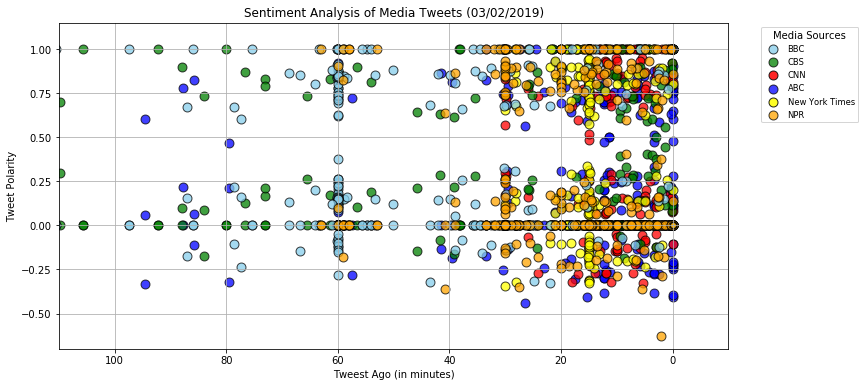

In [98]:
# Plot the sentimental Analysis
date = datetime.strftime(datetime.now(), "%m/%d/%Y")
plt.figure(figsize=(12,6))

plt.xlim(110, -10)
plt.ylim(-0.7, 1.15)
plt.grid(True)

plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.xlabel("Tweest Ago (in minutes)")
plt.ylabel("Tweet Polarity")

target_users_with_colors = {"abcnews": "blue", "CNN": "red", "CBS": "green", "nytimes": "yellow", "BBC": "skyblue", "NPR": "orange"}
for key, value in target_users_with_colors.items():
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"pos_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neg_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neu_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    
# Create dummy objects for legend
h1 = plt.scatter([-0.1], [0], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75, label="BBC")
h2 = plt.scatter([-0.1], [0], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
h3 = plt.scatter([-0.1], [0], marker="o", facecolors="red", edgecolors="black", alpha=0.85, label="CNN")
h4 = plt.scatter([-0.1], [0], marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="ABC")
h5 = plt.scatter([-0.1], [0], marker="o", facecolors="yellow", edgecolors="black", alpha=0.85, label="New York Times")
h6 = plt.scatter([-0.1], [0], marker="o", facecolors="orange", edgecolors="black", alpha=0.75, label="NPR")

# Set legend
legend = plt.legend(handles=[h1, h2, h3, h4, h5, h6], markerscale=1.5, title="Media Sources", bbox_to_anchor=(1.2, 1), fontsize='small', fancybox=True)

# Save plot to file
filename = "sentiment_analysis.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()

#### Findings:
* NY Times and CNN tweet more frequently
* CBS and BBC tweet less frequently

#### Tweets Sentiment

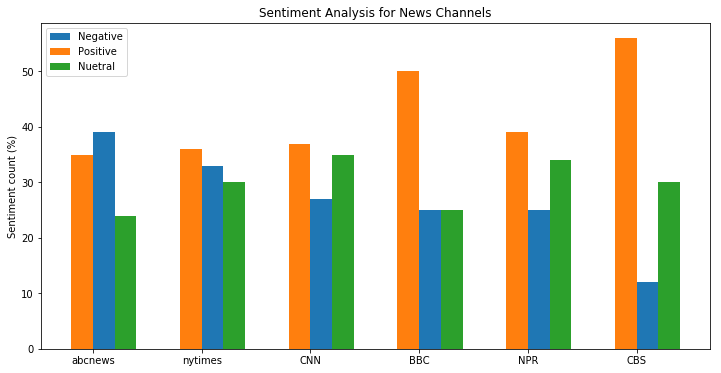

In [114]:
plt.figure(figsize=(12,6))
negative = list(sentiment_pct_transposed['negative'])
positive = list(sentiment_pct_transposed['positive'])
neutral = list(sentiment_pct_transposed['neutral'])
labels = list(sentiment_pct_transposed.index.values)

ind = np.arange(len(negative)) 
width = 0.20       
plt.bar(ind + width, negative, width, label='Negative')
plt.bar(ind, positive, width, label='Positive')
plt.bar(ind + 2*width, neutral, width, label='Nuetral')

plt.ylabel('Sentiment count (%)')
plt.title('Sentiment Analysis for News Channels')

plt.xticks(ind + width / 2, labels)
plt.legend(loc='best')
plt.show()

#### Findings
* ABC News has the most negative tweets, followed by NY Times and CNN
* ABC New has more negative tweets than positive tweets, all others have more positive tweets than negative tweets
* CBS has the most positive tweets, and least negative tweets

In [112]:
# Calculate compound mean for each news network
overall_sentimental = {}
for user in target_users:
    if user == "abcnews":
        user1 = "ABC"
    elif user == "nytimes":
        user1 = "NYT"
    else:
        user1 = user
    overall_sentimental[f"{user1}"] = round(sentiments_df[f"compound_{user}"].mean(),2)
# overall_sentimental = collections.OrderedDict(sorted(overall_sentimental.items(), key=lambda t: t[0]))
# dict(overall_sentimental)
overall_sentimental = dict((sorted(overall_sentimental.items(), key=lambda x: x[1], reverse=True)))
overall_sentimental

{'CBS': 0.3, 'BBC': 0.22, 'CNN': 0.05, 'NPR': 0.03, 'NYT': -0.0, 'ABC': -0.06}

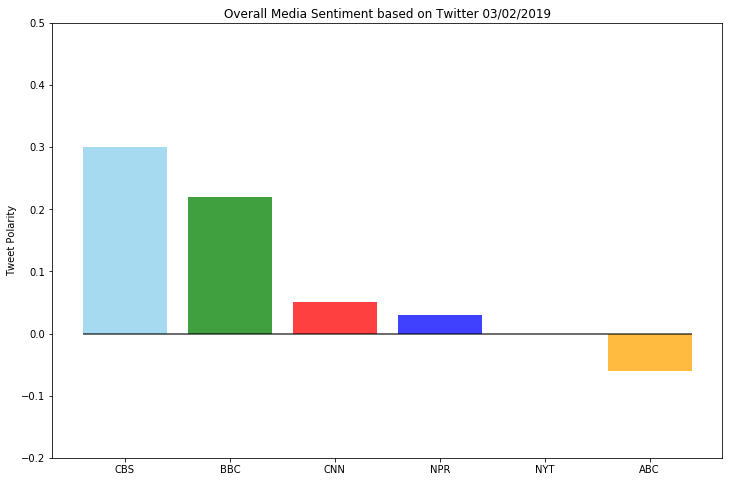

In [113]:
# Plot
plt.figure(figsize=(12,8))
columns = list(overall_sentimental.keys())
average_compound = list(overall_sentimental.values())

# plt.ylim(-min(average_compound) - 0.05, max(average_compound) + 0.05)
plt.ylim(-0.2, 0.5)
x_axis = np.arange(len(columns))
y_axis = list(overall_sentimental.values())

plt.title(f"Overall Media Sentiment based on Twitter {date}")
plt.ylabel("Tweet Polarity")

plt.hlines(y=0, xmin=-0.4, xmax=5.4, alpha=0.75)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, columns)

colors = ["skyblue", "green", "red", "blue", "yellow", "orange"]

for i in range(len(x_axis)):
    plt.bar(x_axis[i], y_axis[i], color=colors[i], alpha=0.75, align="center")
    
# Save plot to file
filename = "overall.png"
plt.savefig(filename, bbox_inches='tight')

plt.show()

#### Findings
Overall, CBS tweets most positively and ABC tweets most negatively

#### Note
The analysis above is based on the most recent 100 tweets extracted at Sat Mar 02 14:18:09 2019